In [1]:
import os
base_dir = r"/home/parth/Machine Learning/Datasets/North Corp/LMD/Raw"
filename = os.path.join(base_dir , "rawfeed_april_0_CAN.csv")

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(filename)

In [4]:
data.columns

Index(['Unnamed: 0', 'id', 'date', 'type', 'deviceID', 'sequenceNo',
       'latitude', 'longitude', 'utc', 'hrlfc', 'sweetSpot', 'topGear',
       'sweetSpotPercent', 'seconds', 'minute', 'hour', 'month', 'day', 'year',
       'minuteOffset', 'hourOffset', 'totalDistance', 'fuelLevel',
       'amberWarningLamp', 'redStopLamp', 'malfunctionLamp',
       'flashMalFunctionLamp', 'sPNLSB', 'sPN8_2ndByte', 'failurMode',
       'sPN3_MSB', 'occurenceCount', 'cCA', 'cCES', 'cCSS', 'engineSpeed',
       'engineStartMode', 'engineOperatingHours', 'powerKeyPos',
       'accPedalIdelSwitch', 'vehicleSpeed', 'controlerTrimMode',
       'engineOilPressure', 'engineCoolantTemp', 'accPedalPosition',
       'tripFuel', 'live'],
      dtype='object')

In [16]:
def plotCoolantTemp(data , min_ , max_):
    data.sort_values("utc" , inplace=True)
    plt.style.use('ggplot')
    plt.xlabel("Time")
    plt.ylabel("Temp")
    plt.title("Coolant Temp Vs Time")
    plt.plot((data["utc"] - data["utc"].min())[min_:max_] , data["engineCoolantTemp"][min_:max_])
    plt.show()

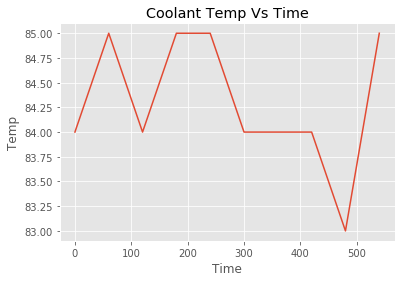

In [17]:
plotCoolantTemp(data.copy() , 0 , 10)

In [18]:
data.head()

,Unnamed: 0,id,date,type,deviceID,sequenceNo,latitude,longitude,utc,hrlfc,...,engineOperatingHours,powerKeyPos,accPedalIdelSwitch,vehicleSpeed,controlerTrimMode,engineOilPressure,engineCoolantTemp,accPedalPosition,tripFuel,live
0,1,8,2019-04-01 00:00:02.0,CAN,359218062578930,4107,21.94126,75.13216,607392002,5708.15,...,1029.55,0,0,0.00,0,0,80,0.0,5708.15,1
1,3,16,2019-04-01 00:00:10.0,CAN,359218062578880,22429,16.76413,80.29130,607392010,2150.79,...,556.40,0,0,0.00,0,0,70,0.0,2150.79,1
2,6,48,2019-04-01 00:00:42.0,CAN,359218062576470,15608,13.28629,75.78487,607392042,3425.60,...,786.30,0,0,0.00,0,0,81,0.0,3425.60,1
3,7,51,2019-04-01 00:00:27.0,CAN,359218062581850,20857,19.46641,73.33467,607392027,5935.49,...,1129.80,0,0,75.23,0,312,84,0.0,5935.49,1
4,10,71,2019-04-01 00:01:02.0,CAN,359218062578930,4109,21.94126,75.13216,607392062,5708.15,...,1029.55,0,0,0.00,0,0,80,0.0,5708.15,1


In [20]:
from datetime import datetime
data["day"] = data["date"].apply(
                    lambda x: datetime.strptime(x , "%Y-%m-%d %H:%M:%S.0")).apply(
                    lambda x: x.strftime("%Y-%m-%d"))

In [63]:
mintempPerDay = {}
maxtempPerDay = {}
for unique_day in data["day"].unique():
    dayData = data["engineCoolantTemp"][data["day"] == unique_day]
    min_day = min(dayData)
    max_day = max(dayData)
    mintempPerDay[unique_day] = min_day
    maxtempPerDay[unique_day] = max_day

In [64]:
temps = [temp for day,temp in mintempPerDay.items()]
days = [day for day,temp in mintempPerDay.items()]

<IPython.core.display.Javascript object>


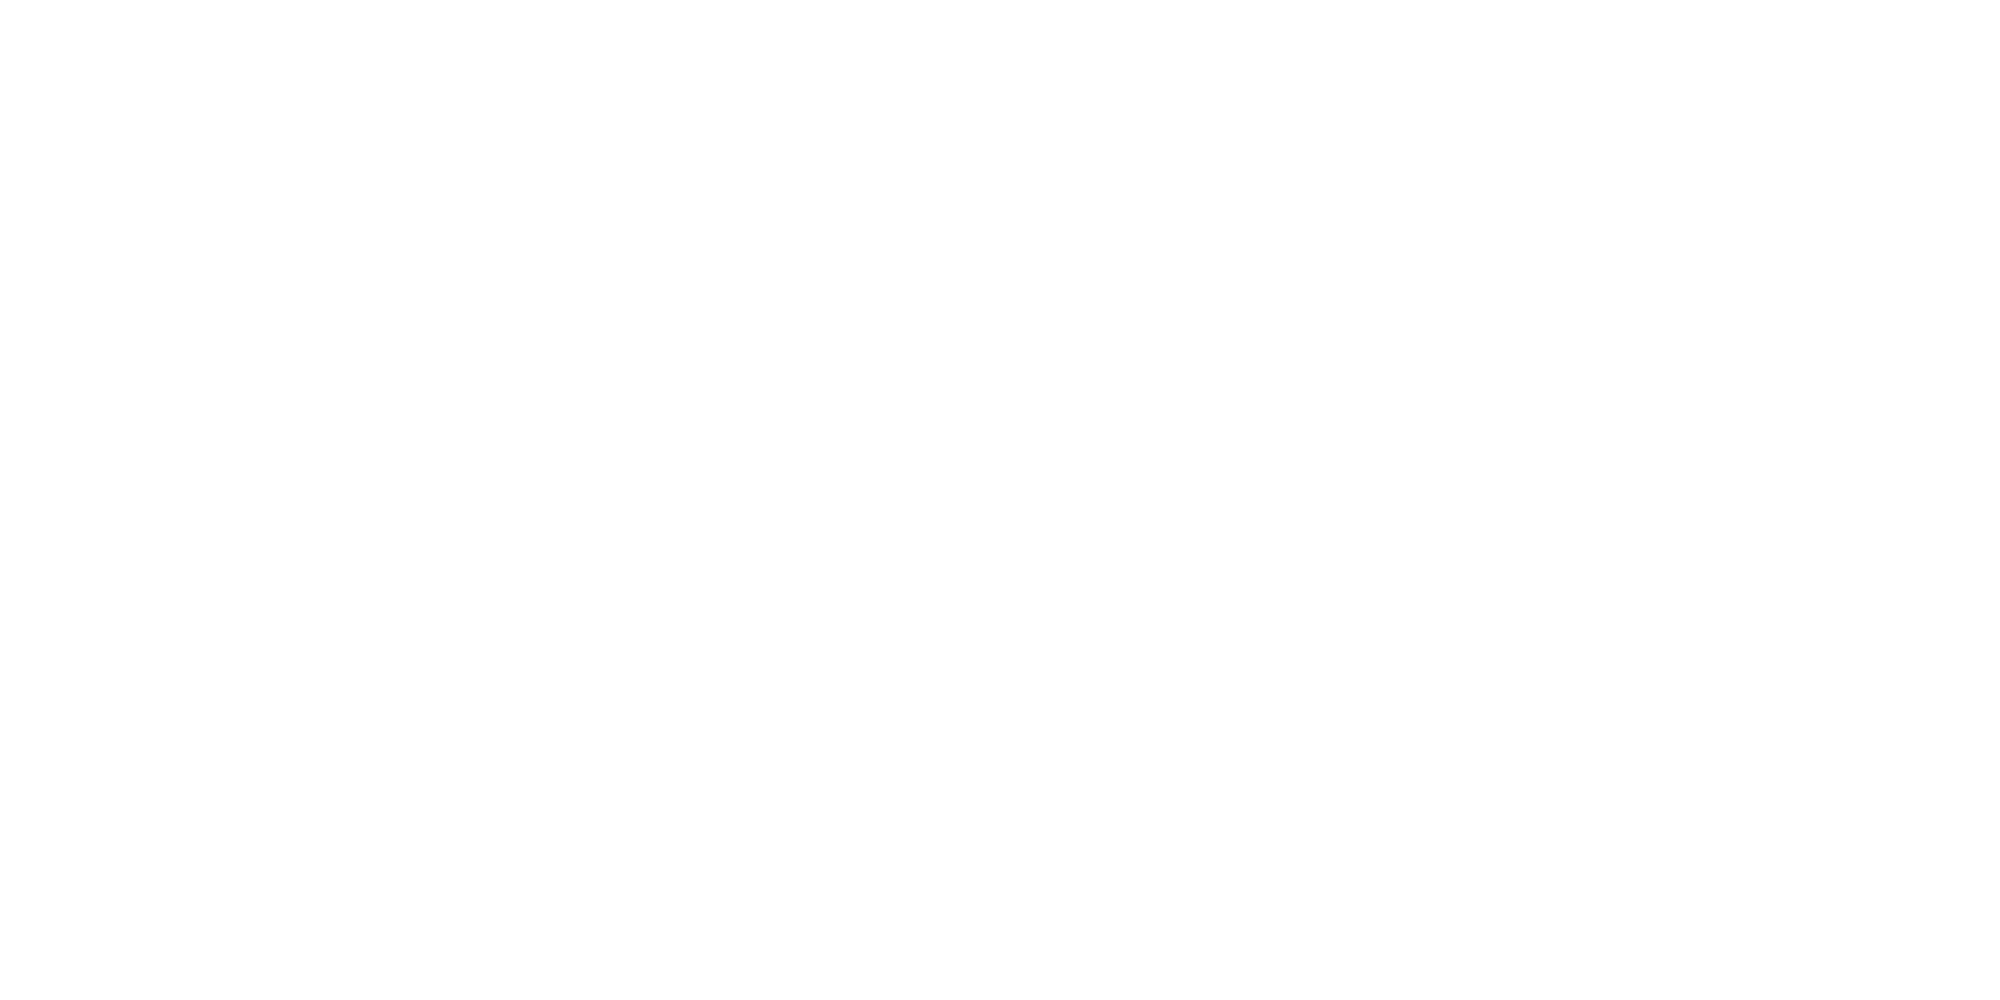

<IPython.core.display.Javascript object>


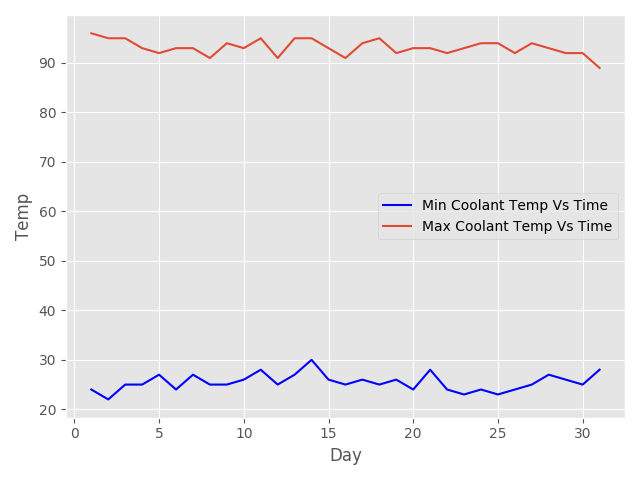

In [82]:
f , ax1 = plt.subplots(1 , 1, figsize=(20,10))
#f.set_figheight(8)
#f.set_figwidth(8)
%matplotlib notebook
temps = [temp for day,temp in mintempPerDay.items()]
days = [day for day,temp in mintempPerDay.items()]
plt.style.use('ggplot')
plt.rcParams.update({"font.size":10})
plt.xlabel("Day")
plt.ylabel("Temp")
days = np.array(days)
temps = np.array(temps)
indx = np.argsort(days)
days = days[indx]
temps = temps[indx]
plt.plot(days[1:], temps[1:] , color='b' , label = "Min Coolant Temp Vs Time")

temps_ = [temp for day,temp in maxtempPerDay.items()]
days_ = [day for day,temp in maxtempPerDay.items()]
days_ = np.array(days_)
temps_ = np.array(temps_)
indx_ = np.argsort(days_)
days_ = days_[indx_]
temps_ = temps_[indx_]
plt.plot(days_[1:], temps_[1:] , label="Max Coolant Temp Vs Time")
plt.legend(loc="center right")
plt.tight_layout()
plt.rcParams.update({'axes.labelsize': 'small'})

plt.show()

In [77]:
plt.rcParams.keys()

/usr/lib/python3.6/_collections_abc.py:705: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  return '{0.__class__.__name__}({0._mapping!r})'.format(self)


KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#E5E5E5',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        